# 0.3.0 Projecting and transforming geometries

In [6]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import contextily

import geopandas as gpd 
from shapely.geometry import Point

import mapclassify

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("../../") 

import utils.paths as path
from utils.paths2 import direcciones

In [8]:
districts = gpd.read_file(path.data_raw_dir("working/paris_districts_utm.geojson"))
districts.geometry = districts.geometry.to_crs(epsg = 4326)
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."


## 0.3.2 Geographic vs projected coordinates

In [9]:
# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())

epsg:4326
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...  
1  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...  
2  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...  
3  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...  
4  POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...  


## 0.3.3 Projecting a GeoDataFrame

In [10]:
# Print the CRS information
print(districts.crs)

epsg:4326


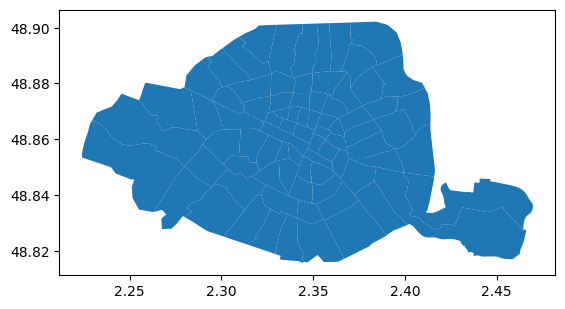

In [11]:
# Plot the districts dataset
districts.plot()
plt.show()

In [12]:
# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

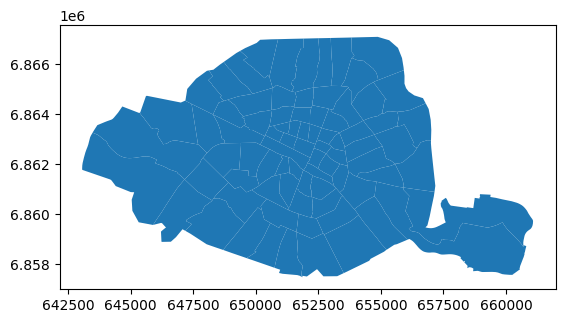

In [14]:
# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

## 0.3.4 Projecting a Point

In [15]:
eiffel_tower = Point(2.2945, 48.8584)

In [16]:
# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = gpd.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'})

In [17]:
# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

In [18]:
# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


## 0.3.5 Calculating distance in a projected CRS

In [19]:
# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

In [28]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv(path.data_raw_dir("working/paris_restaurants.csv"))

# Convert it to a GeoDataFrame
restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:3857")

In [29]:
# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

In [30]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

In [31]:
# The distance to the closest restaurant
print(dist_eiffel.min())

303.5625538786418


## 0.3.6 Projecting to Web Mercator for using web tiles

In [32]:
# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

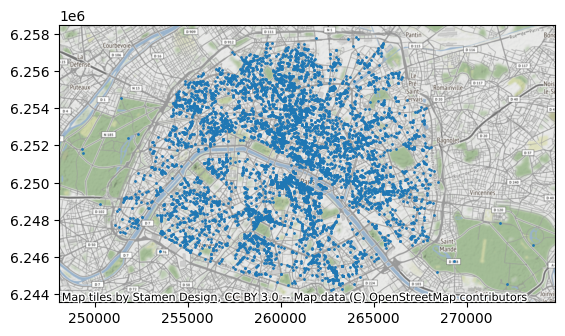

In [35]:
# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize = 1)
contextily.add_basemap(ax)
plt.show()

In [11]:
print('ok_')

ok_
